In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
iris = load_iris()
data = pd.DataFrame(data = iris.data, columns = iris.feature_names)
data.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [ ]:
data['Species'] = iris.target

target = np.unique(iris.target)
target_n = np.unique(iris.target_names)
target_dict = dict(zip(target, target_n))
data['Species'] = data['Species'].replace(target_dict)

In [ ]:
x = data.drop(columns = "Species")
y = data["Species"]
names_features = x.columns
target_labels = y.unique()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 93)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 3, random_state = 93)

dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=93)

In [ ]:
dtc.predict([[3,2,3,4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['virginica'], dtype=object)

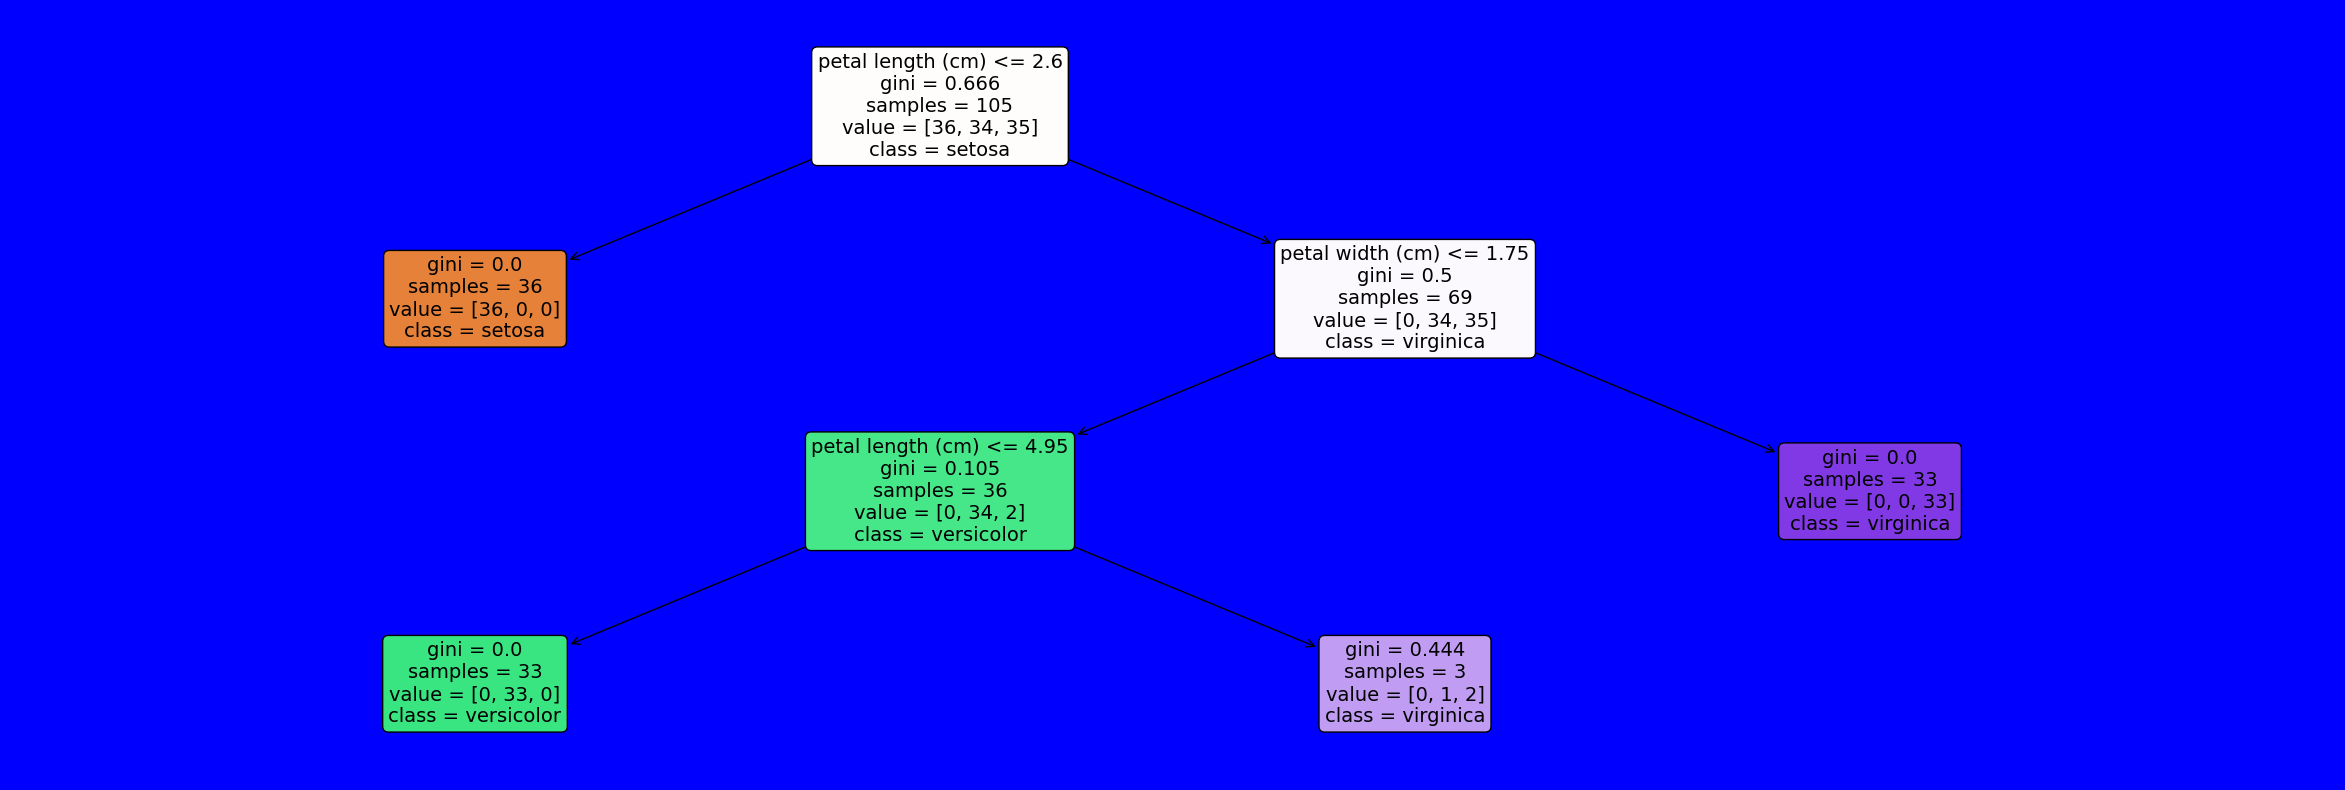

In [ ]:
plt.figure(figsize = (30, 10), facecolor = 'b')
Tree = tree.plot_tree(dtc, feature_names = names_features, class_names = target_labels, rounded = True, filled = True, fontsize = 14)
plt.show()
y_pred = dtc.predict(x_test)

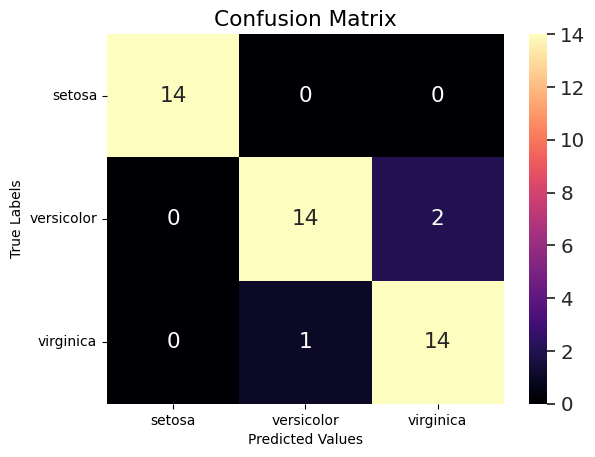

<Figure size 1000x700 with 0 Axes>

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = pd.DataFrame(confusion_matrix)
axis = plt.axes()
sns.set(font_scale = 1.3)
plt.figure(figsize = (10,7))

sns.heatmap(matrix, annot = True, fmt = "g", ax = axis, cmap = "magma")
axis.set_title('Confusion Matrix')
axis.set_xlabel("Predicted Values", fontsize = 10)
axis.set_xticklabels([''] + target_labels)
axis.set_ylabel( "True Labels", fontsize = 10)
axis.set_yticklabels(list(target_labels), rotation = 0)
plt.show()

In [ ]:
from sklearn import metrics
print("accuracy of current model :",metrics.accuracy_score(y_test,y_pred)*100)

accuracy of current model : 93.33333333333333
